In [1]:
from MAUtil import *
from MAInit import *
from MACalc import *
from MAPost import *
import re
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

plt.rcParams["font.size"] = 14
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
figs = [20,50]
fign = [15,4]

In [2]:
from pymongo import MongoClient

In [3]:
# client = MongoClient('localhost', 27017)
# db = client.adsE_database
# collection = db.adsE_method2

### prepare data for prediction ###

In [4]:
formulas = ['Ag', 'Al', 'Au', 'Cu', 'Pt', 'Pd', 'Ni', 'Rh']
faces = ['100', '111']

dictlis = []

for ele in formulas:
    for face in faces:
        dicte = {'formula':ele, 'face':face}
        dictlis.append(dicte)

In [5]:
inst = []
dfall = []
df = []
dfpred = []
dfpred_onlyformula = []

for i in range(len(dictlis)):
    try:
        du = dataset_utilizer('adsE_method2_new', **dictlis[i])
        inst.append(du)
        dfall.append(du.dfall)
        df.append(du.df)
        dfpred.append(du.dfpred)
        dfpred_onlyformula.append(du.dfpred_onlyformula)
    except:
        print('Error: {0}'.format(dictlis[i]))

In [6]:
covset = []
for i in range(len(dfpred)):
    covset.append(sorted(list(set(dfpred[i]['coverage']))))
# covset

### Just show residue ####

Ag 100 0.023114000731727445
Ag 111 0.10886186060998215
Al 100 0.03852199125056321
Al 111 0.07242035334292324
Au 100 0.06090423048770582
Au 111 0.2354275561288555
Cu 100 0.08283242518379592
Cu 111 0.10006175960064963
Pt 100 0.17901315150314273
Pt 111 0.22181467459511078
Pd 100 0.19773032868392085
Pd 111 0.19252600819756988
Ni 100 0.10614268850265127
Ni 111 0.11136314970368909
Rh 100 0.07986399181400822
Rh 111 0.08916327310964357


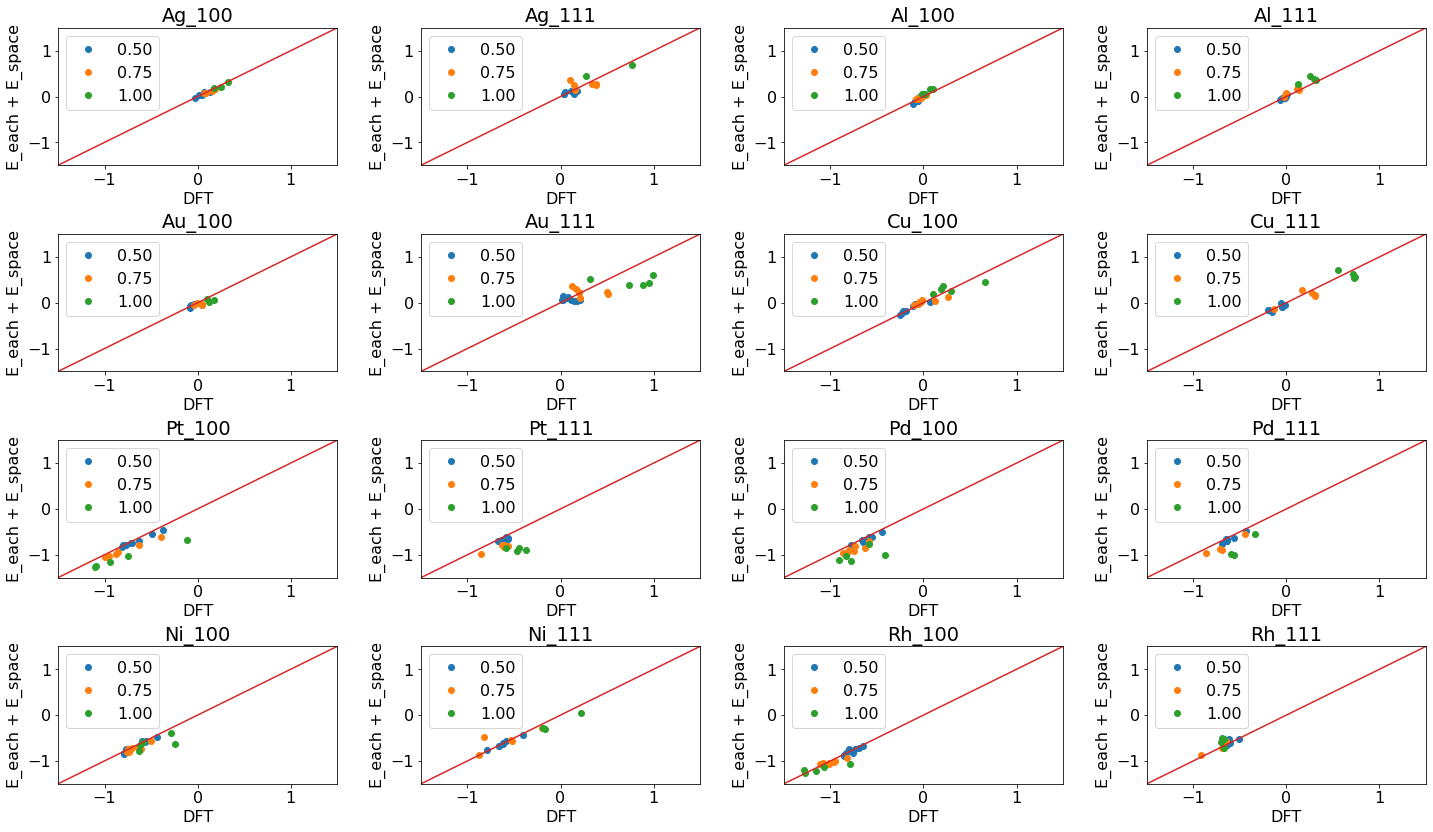

In [7]:
xrange = np.linspace(-2, 2)
# predadsene_surf, adsElis, Eint
fig = plt.figure(figsize=(figs[0],figs[1]))
plt.rcParams["font.size"] = 16

for i in range(len(dfpred)):
    ax = fig.add_subplot(fign[0],fign[1], i+1)
    xmin = 100
    xmax = -100

    for j in range(len(covset[i])):
        if not covset[i][j]:
            continue
        data = dfpred[i][dfpred[i]['coverage'] == covset[i][j]]
        aveadsE_suratom = np.array(data['aveadsE/suratom'])
        E_residue = np.array(data['E_residue/suratom'])
        E_prepred = aveadsE_suratom - E_residue
        if not aveadsE_suratom.any():
            continue
        if xmin > np.min(aveadsE_suratom):
            xmin = np.min(aveadsE_suratom)
        if xmax < np.max(aveadsE_suratom):
            xmax = np.max(aveadsE_suratom)
        ax.plot(aveadsE_suratom, E_prepred, 'o')
   
    ax.plot(xrange, xrange, '-')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    ax.set_title('{}_{}'.format(dictlis[i]['formula'], dictlis[i]['face']))
#     ax.legend(['{0:.2f}'.format(item) for item in covset[i]], bbox_to_anchor=(1, 0.8))
    ax.legend(['{0:.2f}'.format(item) for item in covset[i]])
    ax.set_xlabel('DFT')
    ax.set_ylabel('E_each + E_space')
#     plt.savefig('{}_{}_predE_wCObondfix.png'.format(dictlis[i]['element'], dictlis[i]['mirror']), bbox_inches='tight')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
    
    if not covset[i]:
        continue
    data = dfpred[i]
    aveadsE_suratom = np.array(data['aveadsE/suratom'])
    E_residue = np.array(data['E_residue/suratom'])
    E_prepred = aveadsE_suratom - E_residue    
    print(dictlis[i]['formula'], dictlis[i]['face'], np.sqrt(mean_squared_error(aveadsE_suratom, E_prepred)))
    
# plt.savefig('E_residue.png', bbox_inches='tight')
plt.show()

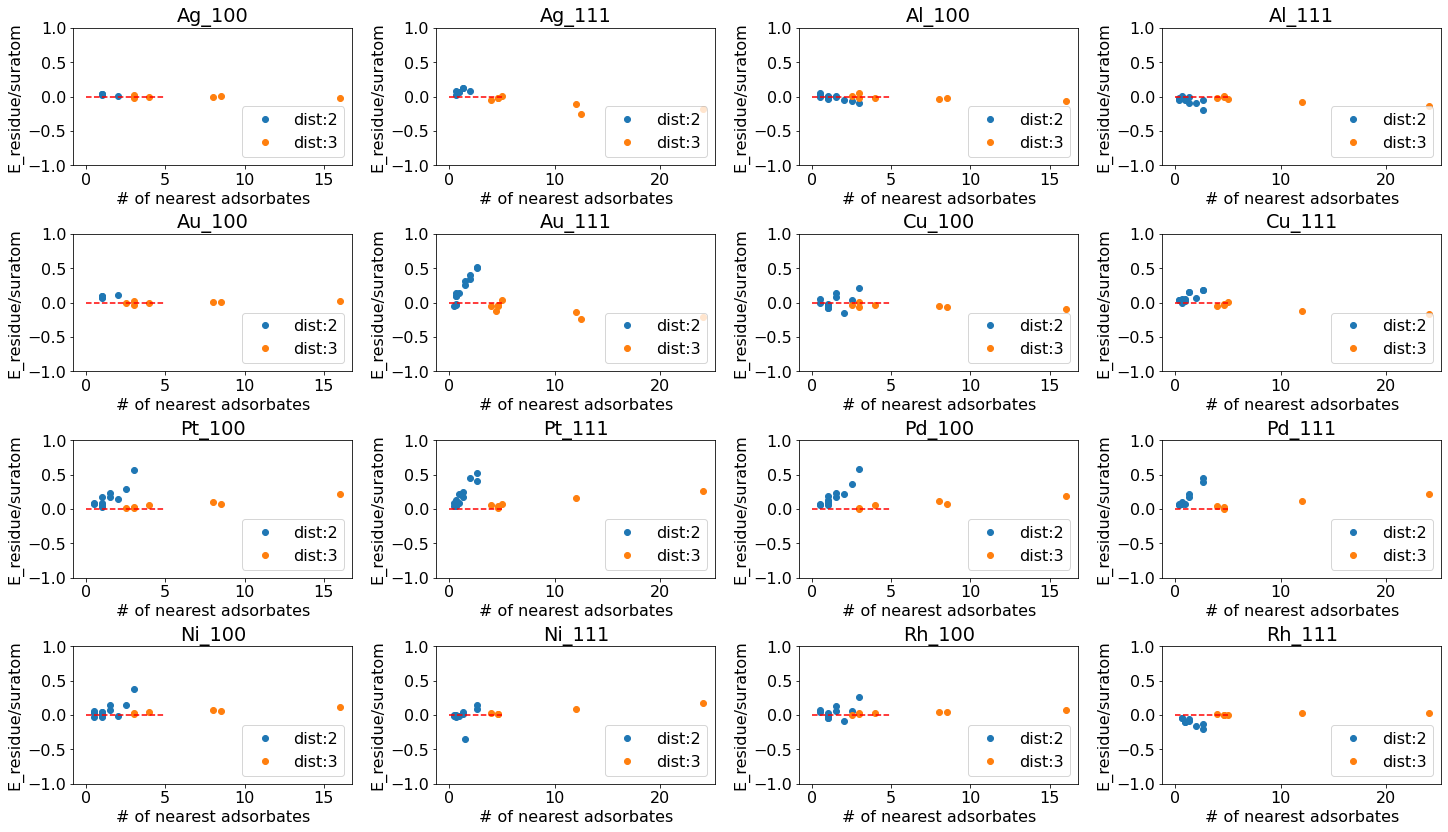

In [8]:
fig = plt.figure(figsize=(figs[0],figs[1]))
plt.rcParams["font.size"] = 16


xmin = 0
xmax = 5
for i in range(len(dfpred)):
    ax = fig.add_subplot(fign[0],fign[1], i+1)
    ax.plot(dfpred[i][dfpred[i]['minimum_distance']==2]['ads_dist2'], dfpred[i][dfpred[i]['minimum_distance']==2]['E_residue/suratom'], 'o')
    ax.plot(dfpred[i][dfpred[i]['minimum_distance']==3]['ads_dist3'], dfpred[i][dfpred[i]['minimum_distance']==3]['E_residue/suratom'], 'o')
    ax.plot([xmin,xmax],[0,0], "red", linestyle='dashed') # normal way
    ax.set_title('{}_{}'.format(dictlis[i]['formula'], dictlis[i]['face']))
    ax.set_xlabel('# of nearest adsorbates')
    ax.set_ylabel('E_residue/suratom')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
    plt.legend(['dist:2','dist:3'], loc='lower right')
# plt.savefig('')
  #  plt.xlim(xmin,xmax)
    plt.ylim(-1,1)
plt.show()

### Parameters specific to material and face

Ag 100 0.016539517845130147 0.0233927117155994 -0.0008789206455014601 0.00782224047592699 0.000807070854765492
Ag 111 0.04426761293461467 0.12451407733867072 -0.009218314970286377 0.017399233192246063 0.0014477718349590679
Al 100 0.026472089489818558 -0.014527658416896221 -0.002316465259944394 0.006075023553006505 0.0011368053302188528
Al 111 0.035706023468853015 -0.02296416538007827 -0.004744422379048623 0.00915329868922716 0.001196188065575856
Au 100 0.01819817584803992 0.06459780506354719 0.0015253946514975658 0.008523990610741876 0.0008758404192893085
Au 111 0.0642715085938652 0.22742891095968554 -0.009505130288468581 0.015638628406850517 0.0018646279223920078
Cu 100 0.0575518370914955 0.048066716654456915 -0.010148742776864172 0.013416462661364948 0.0024818835857948734
Cu 111 0.029083740172890483 0.09607302339239782 -0.006610945307707783 0.007545359166907145 0.0009785293391816952
Pt 100 0.07433064946879508 0.11017149937304889 0.006990273352604106 0.017327933105031345 0.00320545838

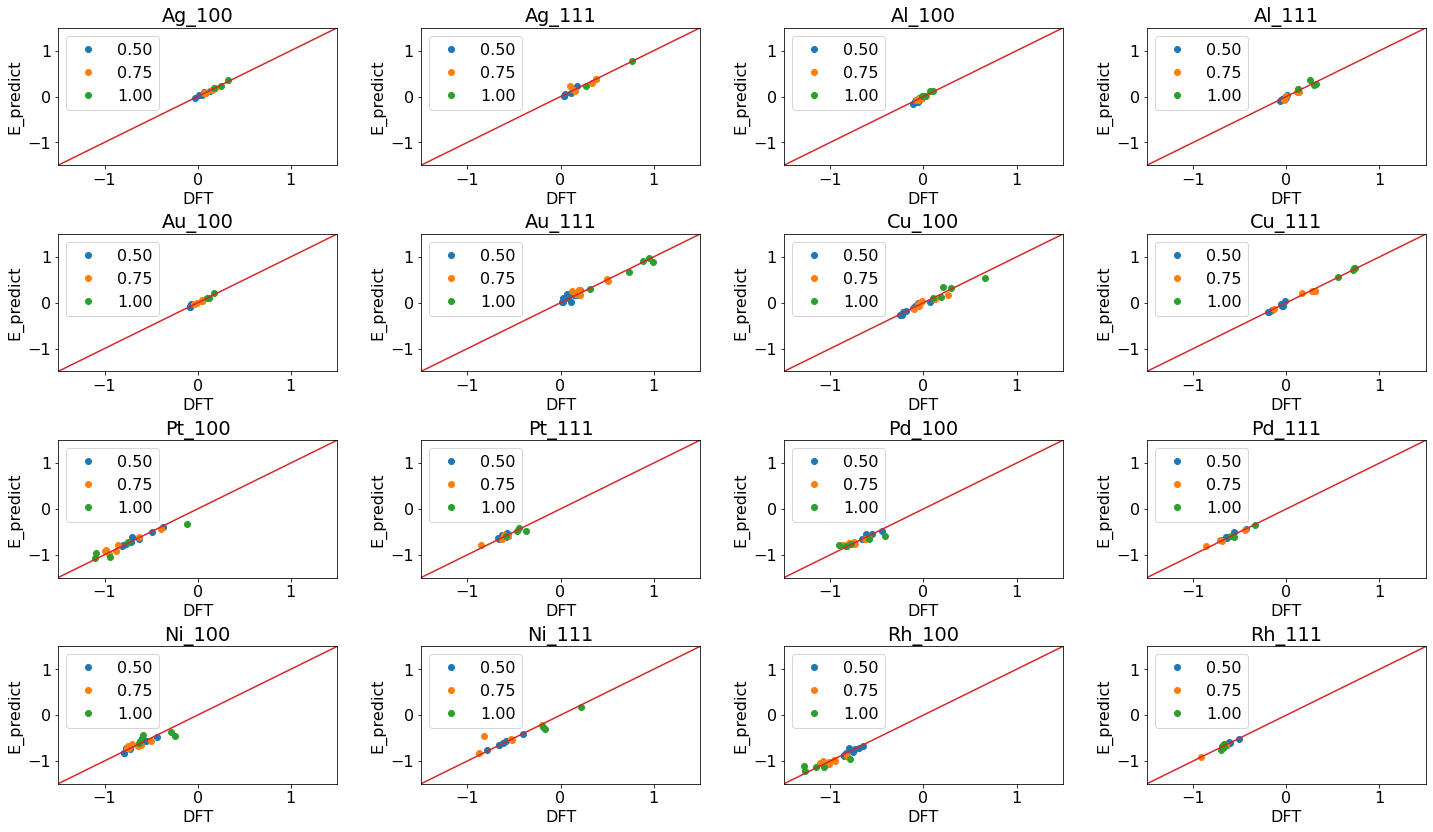

In [13]:
xrange = np.linspace(-10, 10)
# predadsene_surf, adsElis, Eint
fig = plt.figure(figsize=(figs[0],figs[1]))
plt.rcParams["font.size"] = 16
mselis = []
weightslis = []
std_errslis = []

for i in range(len(dfpred)):
    ax = fig.add_subplot(fign[0],fign[1], i+1)
    xmin = 100
    xmax = -100
    try:
        weights, std_errs = inst[i].fit_weight_from_specific_formula_and_face()
        weightslis.append(weights)
        std_errslis.append(std_errs)
    except:
        weightslis.append(np.array([0,0]))
        std_errslis.append(np.array([0,0]))
        print('Data unusable')

    for j in range(len(covset[i])):
        data = dfpred[i][dfpred[i]['coverage'] == covset[i][j]]

        E_residue_pred = data['ads_dist2'] * weights[0] + data['ads_dist3'] * weights[1]
        E_ads_pred = (data['E_int_space'] + data['sumE_each_ads'])/data['surfatomnum'] + E_residue_pred

# total, not /site
#         E_ads_pred = (data['E_int_space'] + data['sumE_each_ads']) + E_residue_pred*data['surfatomnum']
#         aveadsE_suratom = data['aveadsE/suratom']*data['surfatomnum']

        aveadsE_suratom = data['aveadsE/suratom']
        if not aveadsE_suratom.any():
            continue
        if xmin > np.min(aveadsE_suratom):
            xmin = np.min(aveadsE_suratom)
        if xmax < np.max(aveadsE_suratom):
            xmax = np.max(aveadsE_suratom)
        ax.plot(aveadsE_suratom, E_ads_pred, 'o')
    ax.plot(xrange, xrange, '-')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    
#     plt.xlim(-6, 2)
#     plt.ylim(-6, 2)
    ax.set_title('{}_{}'.format(dictlis[i]['formula'], dictlis[i]['face']))
#     ax.legend(['{0:.2f}'.format(item) for item in covset[i]], bbox_to_anchor=(1, 0.8))
    ax.legend(['{0:.2f}'.format(item) for item in covset[i]])
    ax.set_xlabel('DFT')
    ax.set_ylabel('E_predict')
#     plt.savefig('{}_{}_predE_wCObondfix.png'.format(dictlis[i]['element'], dictlis[i]['mirror']), bbox_inches='tight')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
    
    if not covset[i]:
        continue
    data = dfpred[i]
    E_residue_pred = data['ads_dist2'] * weights[0] + data['ads_dist3'] * weights[1]
    E_ads_pred = (data['E_int_space'] + data['sumE_each_ads'])/data['surfatomnum'] + E_residue_pred
    aveadsE_suratom = data['aveadsE/suratom']
# total, not /site
#     E_ads_pred = (data['E_int_space'] + data['sumE_each_ads']) + E_residue_pred*data['surfatomnum']
#     aveadsE_suratom = data['aveadsE/suratom']*data['surfatomnum']

    rmse = np.sqrt(mean_squared_error(aveadsE_suratom, E_ads_pred))
    mselis.append(rmse)
    print(dictlis[i]['formula'], dictlis[i]['face'], rmse, *weights, *std_errs)

weightslis = np.array(weightslis)
std_errslis = np.array(std_errslis)
# plt.savefig('E_pred_wmf_method3.png', bbox_inches='tight')
# plt.show()

In [11]:
labels = []

for i in range(len(dfpred)):
    labels.append(dictlis[i]['formula'] +' '+ dictlis[i]['face'])
# dictlis[i]['element'], dictlis[i]['face']

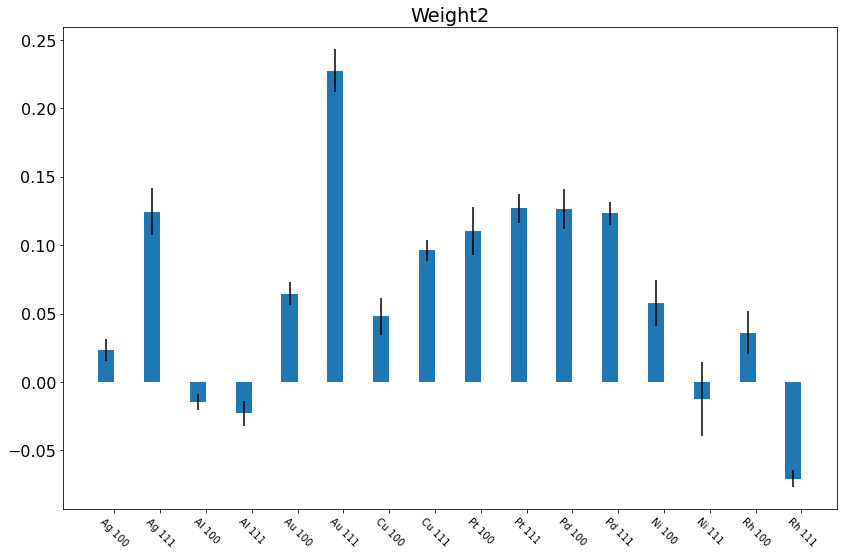

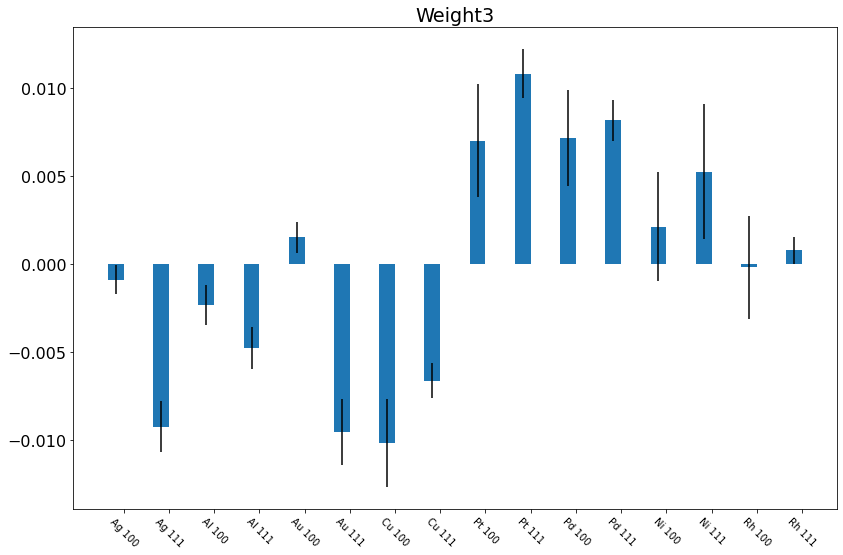

In [12]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, weightslis[:,0], width, yerr = std_errslis[:,0])

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('weight2')
ax.set_title('Weight2')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=-45, fontsize=10)

fig.tight_layout()
plt.width = 10

plt.show()


fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, weightslis[:,1], width, yerr = std_errslis[:,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('weight2')
ax.set_title('Weight3')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=-45, fontsize=10)

fig.tight_layout()
plt.width = 10

plt.show()

### Parameters only specific to material

Ag 100 0.03184213286300195 0.04870512669495628 -0.005070029504915425 0.010092865534583184 0.001235325521115855
Ag 111 0.0716497648809576 0.04870512669495628 -0.005070029504915425 0.010092865534583184 0.001235325521115855
Al 100 0.03235576462814754 -0.005635933507417743 -0.00579067843850395 0.005097851451239729 0.000770640661496969
Al 111 0.03956986118905327 -0.005635933507417743 -0.00579067843850395 0.005097851451239729 0.000770640661496969
Au 100 0.05299205393713966 0.14118207371237823 -0.0038672655422925598 0.018955649416605304 0.00235344621946757
Au 111 0.10390009593306823 0.14118207371237823 -0.0038672655422925598 0.018955649416605304 0.00235344621946757
Cu 100 0.06277706938043662 0.030982942442098545 -0.005634477529717996 0.010772229334882475 0.0018671317002168974
Cu 111 0.07967156480005771 0.030982942442098545 -0.005634477529717996 0.010772229334882475 0.0018671317002168974
Pt 100 0.08263045409088154 0.13994093397525104 0.007015918103408476 0.013305626280490779 0.0019637540660655

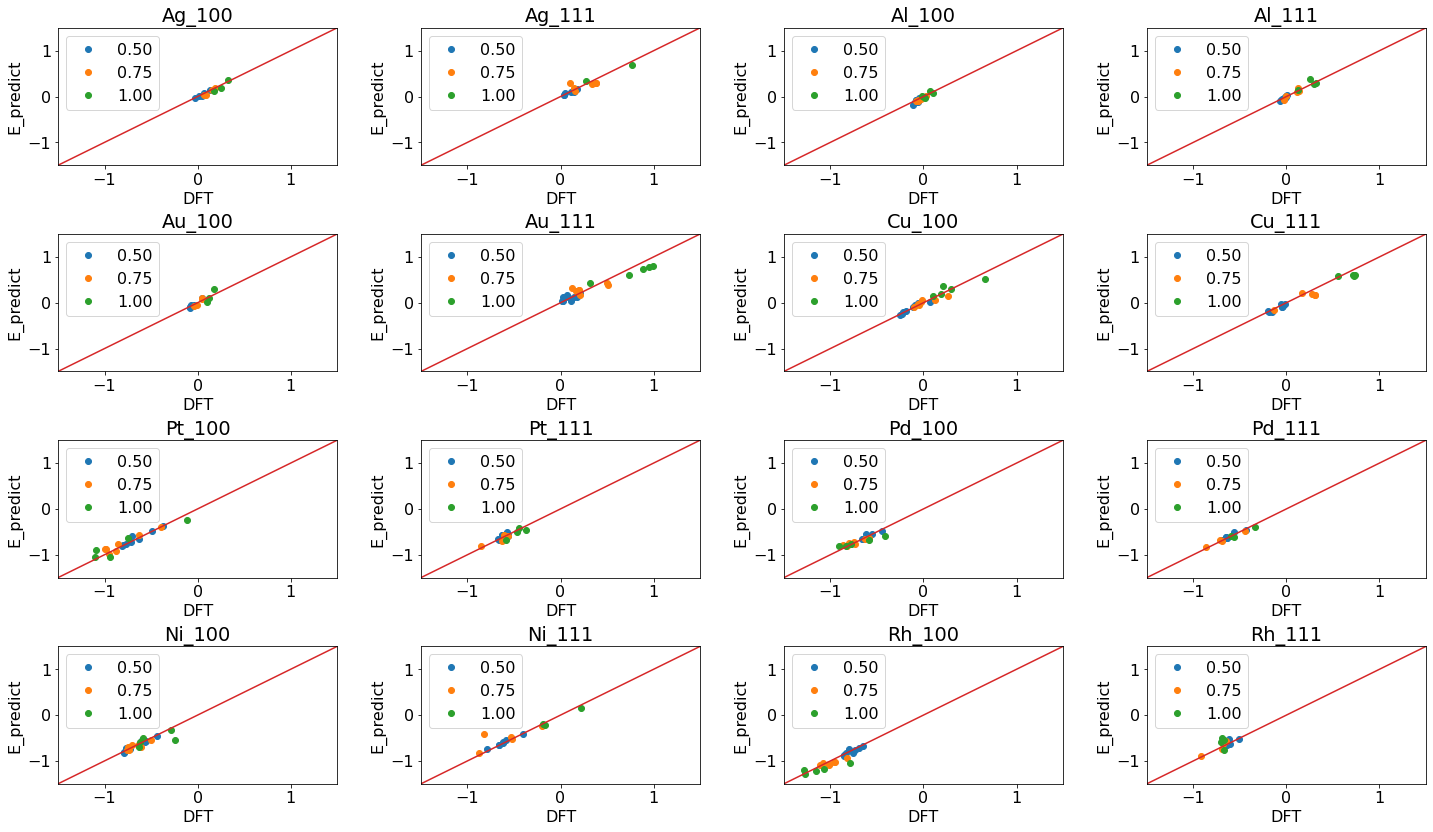

In [12]:
xrange = np.linspace(-2, 2)
# predadsene_surf, adsElis, Eint
fig = plt.figure(figsize=(figs[0],figs[1]))
plt.rcParams["font.size"] = 16

for i in range(len(dfpred)):
    ax = fig.add_subplot(fign[0],fign[1], i+1)
    xmin = 100
    xmax = -100
#     try:
    weights, std_errs = inst[i].fit_weight_from_specific_formula()
#     except:
#         print('Data unusable')

    for j in range(len(covset[i])):
        data = dfpred[i][dfpred[i]['coverage'] == covset[i][j]]
        E_residue_pred = data['ads_dist2'] * weights[0] + data['ads_dist3'] * weights[1]
        E_ads_pred = (data['E_int_space'] + data['sumE_each_ads'])/data['surfatomnum'] + E_residue_pred

        aveadsE_suratom = data['aveadsE/suratom']
        if not aveadsE_suratom.any():
            continue
        if xmin > np.min(aveadsE_suratom):
            xmin = np.min(aveadsE_suratom)
        if xmax < np.max(aveadsE_suratom):
            xmax = np.max(aveadsE_suratom)
        ax.plot(aveadsE_suratom, E_ads_pred, 'o')
    ax.plot(xrange, xrange, '-')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    ax.set_title('{}_{}'.format(dictlis[i]['formula'], dictlis[i]['face']))
#     ax.legend(['{0:.2f}'.format(item) for item in covset[i]], bbox_to_anchor=(1, 0.8))
    ax.legend(['{0:.2f}'.format(item) for item in covset[i]])
    ax.set_xlabel('DFT')
    ax.set_ylabel('E_predict')
#     plt.savefig('{}_{}_predE_wCObondfix.png'.format(dictlis[i]['element'], dictlis[i]['mirror']), bbox_inches='tight')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
    
    if not covset[i]:
        continue
    data = dfpred[i]
    E_residue_pred = data['ads_dist2'] * weights[0] + data['ads_dist3'] * weights[1]
    E_ads_pred = (data['E_int_space'] + data['sumE_each_ads'])/data['surfatomnum'] + E_residue_pred
    aveadsE_suratom = data['aveadsE/suratom']    
    print(dictlis[i]['formula'], dictlis[i]['face'], np.sqrt(mean_squared_error(aveadsE_suratom, E_ads_pred)), *weights, *std_errs)

# plt.savefig('E_pred_wm_method2.png', bbox_inches='tight')
# plt.show()

In [19]:
df[-5]#[dfall[-5]['numberofads']==1]

,_id,name,isvalid,ispredictable,formula,face,unitlength,xc,adsorbate,numberofads,coverage,surfatomnum,E,bareE,E_ads,totaladsE,aveadsE/suratom,aveadsE/ads,E_int_space,sumE_each_ads,E_residue/suratom,area,density,igroups,rgroups,converged,is_adsorbed,kept_sites,E_not_exceeded,minimum_distance,ads_dist2,ads_dist3
0,5ef452001fa36aa7694afec7,Pd_111_u2_RPBE_no001_CO_n1_d9.traj,yes,no,Pd,111,2,RPBE,CO,1,0.25,4,-67.317241,-51.668902,-14.485436,-1.162903,-0.290726,-1.162903,0.003645,NaN,NaN,27.437009,0.036447,[0],[0],yes,yes,yes,yes,Over 4,0.000000,0.000000
1,5ef452041fa36aa7694afec9,Pd_111_u2_RPBE_no002_CO_n1_d9.traj,yes,no,Pd,111,2,RPBE,CO,1,0.25,4,-67.644645,-51.668902,-14.485436,-1.490307,-0.372577,-1.490307,0.003645,NaN,NaN,27.437009,0.036447,[1],[1],yes,yes,yes,yes,3,0.000000,0.500000
2,5ef452081fa36aa7694afecb,Pd_111_u2_RPBE_no002_CO_n2_d3.traj,yes,yes,Pd,111,2,RPBE,CO,2,0.50,4,-82.376499,-51.668902,-14.485436,-1.736725,-0.434181,-0.868362,0.420280,-2.325807,0.042200,27.437009,0.072894,"[0, 0]","[0, 0]",yes,yes,yes,yes,3,0.000000,4.000000
3,5ef4520c1fa36aa7694afecd,Pd_111_u2_RPBE_no003_CO_n1_d9.traj,yes,no,Pd,111,2,RPBE,CO,1,0.25,4,-67.781357,-51.668902,-14.485436,-1.627019,-0.406755,-1.627019,0.003844,NaN,NaN,27.437009,0.036447,[2],[2],yes,yes,yes,yes,3,0.000000,0.666667
4,5ef452131fa36aa7694afecf,Pd_111_u2_RPBE_no003_CO_n3_d3.traj,yes,yes,Pd,111,2,RPBE,CO,3,0.75,4,-96.907416,-51.668902,-14.485436,-1.782205,-0.445551,-0.594068,1.258196,-3.488710,0.112077,27.437009,0.109341,"[0, 0, 0]","[0, 0, 0]",yes,yes,yes,yes,3,0.000000,12.000000
5,5ef452181fa36aa7694afed1,Pd_111_u2_RPBE_no004_CO_n1_d9.traj,yes,no,Pd,111,2,RPBE,CO,1,0.25,4,-67.755252,-51.668902,-14.485436,-1.600914,-0.400229,-1.600914,0.003844,NaN,NaN,27.437009,0.036447,[3],[3],yes,yes,yes,yes,3,0.000000,0.666667
6,5ef4521c1fa36aa7694afed3,Pd_111_u2_RPBE_no004_CO_n4_d3.traj,yes,yes,Pd,111,2,RPBE,CO,4,1.00,4,-110.957271,-51.668902,-14.485436,-1.346623,-0.336656,-0.336656,2.460827,-4.651613,0.211041,27.437009,0.145788,"[0, 0, 0, 0]","[0, 0, 0, 0]",yes,yes,yes,yes,3,0.000000,24.000000
7,5ef452201fa36aa7694afed5,Pd_111_u2_RPBE_no005_CO_n2_d3.traj,yes,yes,Pd,111,2,RPBE,CO,2,0.50,4,-83.250522,-51.668902,-14.485436,-2.610747,-0.652687,-1.305374,0.151806,-2.763818,0.000316,27.437009,0.072894,"[3, 0]","[3, 0]",yes,yes,yes,yes,3,0.000000,4.666667
8,5ef452241fa36aa7694afed7,Pd_111_u2_RPBE_no006_CO_n3_d3.traj,yes,yes,Pd,111,2,RPBE,CO,3,0.75,4,-98.602440,-51.668902,-14.485436,-3.477229,-0.869307,-1.159076,0.512480,-4.390837,0.100282,27.437009,0.109341,"[2, 3, 0]","[2, 3, 0]",yes,yes,yes,yes,2,0.666667,9.333333
9,5ef452291fa36aa7694afed9,Pd_111_u2_RPBE_no007_CO_n2_d3.traj,yes,yes,Pd,111,2,RPBE,CO,2,0.50,4,-83.183552,-51.668902,-14.485436,-2.543778,-0.635944,-1.271889,0.152208,-2.789922,0.023484,27.437009,0.072894,"[2, 0]","[2, 0]",yes,yes,yes,yes,3,0.000000,4.666667


In [14]:
init_query('ZnCu_110_u2_RPBE_no004_CO_n1_d10.traj','local')
query('ZnCu_110_u2_RPBE_no004_CO_n1_d10.traj','local')

Atoms(symbols='Zn2Cu2Zn2Cu2Zn2Cu2Zn2Cu2Zn2Cu2Zn2Cu2Zn2Cu2Zn2Cu2CO', pbc=[True, True, False], cell=[[6.0140740590921835, 0.0, 4e-16], [1.4e-15, 8.505185099484375, 5e-16], [0.0, 0.0, 25.51555529845313]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 8, 9, 10, 11, 16, 17, 18, 19, 24, 25, 26, 27]), calculator=SinglePointCalculator(...))

In [15]:
a = 1
dfall[a]#[dfall[a]['numberofads']==1]

,_id,name,isvalid,ispredictable,formula,face,unitlength,xc,adsorbate,numberofads,coverage,surfatomnum,E,bareE,E_ads,totaladsE,aveadsE/suratom,aveadsE/ads,E_int_space,sumE_each_ads,E_residue/suratom,area,density,igroups,rgroups,converged,is_adsorbed,kept_sites,E_not_exceeded,minimum_distance,ads_dist2,ads_dist3
0,5ef4321a1fa36aa7694af937,Ag_111_u2_RPBE_no001_CO_n1_d9.traj,yes,no,Ag,111,2,RPBE,CO,1,0.25,4,-38.543447,-24.141135,-14.485436,0.083125,0.020781,0.083125,0.002686,NaN,NaN,30.745793,0.032525,[0],[0],yes,yes,yes,yes,Over 4,0.000000,0.000000
1,5ef432211fa36aa7694af939,Ag_111_u2_RPBE_no002_CO_n1_d9.traj,yes,no,Ag,111,2,RPBE,CO,1,0.25,4,-38.520138,-24.141135,-14.485436,0.106433,0.026608,0.106433,0.002686,NaN,NaN,30.745793,0.032525,[1],[1],yes,yes,yes,yes,3,0.000000,0.500000
2,5ef432281fa36aa7694af93b,Ag_111_u2_RPBE_no002_CO_n2_d3.traj,yes,yes,Ag,111,2,RPBE,CO,2,0.50,4,-52.904585,-24.141135,-14.485436,0.207423,0.051856,0.103711,0.242713,0.166249,-0.050385,30.745793,0.065050,"[0, 0]","[0, 0]",yes,yes,yes,yes,3,0.000000,4.000000
3,5ef4322c1fa36aa7694af93d,Ag_111_u2_RPBE_no003_CO_n1_d9.traj,yes,no,Ag,111,2,RPBE,CO,1,0.25,4,-38.526342,-24.141135,-14.485436,0.100229,0.025057,0.100229,0.002635,NaN,NaN,30.745793,0.032525,[2],[2],yes,yes,yes,yes,3,0.000000,0.666667
4,5ef432331fa36aa7694af93f,Ag_111_u2_RPBE_no003_CO_n3_d3.traj,yes,yes,Ag,111,2,RPBE,CO,3,0.75,4,-67.037747,-24.141135,-14.485436,0.559697,0.139924,0.186566,0.752903,0.249374,-0.110645,30.745793,0.097574,"[0, 0, 0]","[0, 0, 0]",yes,yes,yes,yes,3,0.000000,12.000000
5,5ef432381fa36aa7694af941,Ag_111_u2_RPBE_no004_CO_n1_d9.traj,yes,no,Ag,111,2,RPBE,CO,1,0.25,4,-38.533430,-24.141135,-14.485436,0.093141,0.023285,0.093141,0.002634,NaN,NaN,30.745793,0.032525,[3],[3],yes,yes,yes,yes,3,0.000000,0.666667
6,5ef4323c1fa36aa7694af943,Ag_111_u2_RPBE_no004_CO_n4_d3.traj,yes,yes,Ag,111,2,RPBE,CO,4,1.00,4,-80.980724,-24.141135,-14.485436,1.102157,0.275539,0.275539,1.502406,0.332499,-0.183187,30.745793,0.130099,"[0, 0, 0, 0]","[0, 0, 0, 0]",yes,yes,yes,yes,3,0.000000,24.000000
7,5ef432411fa36aa7694af945,Ag_111_u2_RPBE_no005_CO_n3_d3.traj,yes,yes,Ag,111,2,RPBE,CO,3,0.75,4,-67.200132,-24.141135,-14.485436,0.397312,0.099328,0.132437,1.140389,0.272683,-0.253940,30.745793,0.097574,"[1, 0, 0]","[1, 0, 0]",yes,yes,yes,yes,3,0.000000,12.500000
8,5ef432461fa36aa7694af947,Ag_111_u2_RPBE_no006_CO_n4_d3.traj,no,yes,Ag,111,2,RPBE,CO,4,1.00,4,-80.990952,-24.141135,-14.485436,1.091929,0.272982,0.272982,2.307022,0.379116,-0.398552,30.745793,0.130099,"[1, 1, 0, 0]","[1, 1, 0, 0]",no,no,yes,yes,2,1.000000,1.000000
9,5ef4324e1fa36aa7694af949,Ag_111_u2_RPBE_no007_CO_n2_d3.traj,no,yes,Ag,111,2,RPBE,CO,2,0.50,4,-52.947795,-24.141135,-14.485436,0.164213,0.041053,0.082107,0.435073,0.183354,-0.113554,30.745793,0.065050,"[1, 0]","[2, 0]",yes,yes,no,yes,3,0.000000,4.666667
